In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [65]:
size = 25

x = torch.linspace(0, 1, size)[:, None]
y = 10 * x
yn= y + torch.randn(size, 1) / 5
# yn = y

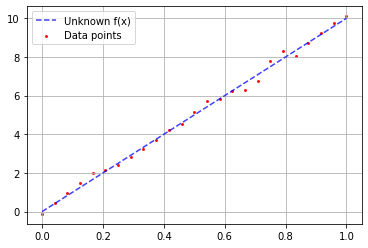

In [66]:
plt.title('')
plt.scatter(x[:, 0], yn[:, 0], 8, c='r', linewidths=0.1, label='Data points')
plt.plot(x, y, '--b', label='Unknown f(x)', alpha=0.75)
plt.legend()
plt.grid()

In [67]:
lr = 0.01

regr_lasso = nn.Linear(1, 1, bias=False)
beta_lasso = list(regr_lasso.modules())[0].weight
opt_lasso  = optim.Adam(regr_lasso.parameters(), lr=lr)

regr_ridge = nn.Linear(1, 1, bias=False)
beta_ridge = list(regr_ridge.modules())[0].weight
opt_ridge  = optim.Adam(regr_ridge.parameters(), lr=lr)

regr_rlad = nn.Linear(1, 1, bias=False)
beta_rlad = list(regr_rlad.modules())[0].weight
opt_rlad  = optim.Adam(regr_rlad.parameters(), lr=lr)

In [68]:
mae = lambda x: torch.mean(torch.abs(x))
mse = lambda x: torch.mean(x ** 2)

In [69]:
def train(regr, beta, opt, ll, rl):
    epochs = 1500
    errors = []
    for epoch in range(1, epochs):

        opt.zero_grad()
        
        yp = regr(x)
        loss = ll(yp - y) + rl(beta)
        errors += [loss.item()]
        loss.backward()
        opt.step()

        if epoch % 1000 == 0:
            print(f'Regr regression {epoch} with {loss.item()}')
            
#         if loss.item() < 0.04:
#             print(loss.item())
#             break
       
    return errors
    
regr = regr_lasso
beta = beta_lasso
opt  = opt_lasso
lasso_errors = train(regr, beta, opt, lambda x: mse(x), lambda x: mae(x))

regr = regr_ridge
beta = beta_ridge
opt  = opt_ridge
ridge_errors = train(regr, beta, opt, lambda x: mse(x), lambda x: mse(x))

regr = regr_rlad
beta = beta_rlad
opt  = opt_rlad
rlad_errors = train(regr, beta, opt, lambda x: mae(x), lambda x: mae(x))

Regr regression 1000 with 10.816449165344238
Regr regression 1000 with 25.38865852355957
Regr regression 1000 with 5.000288009643555


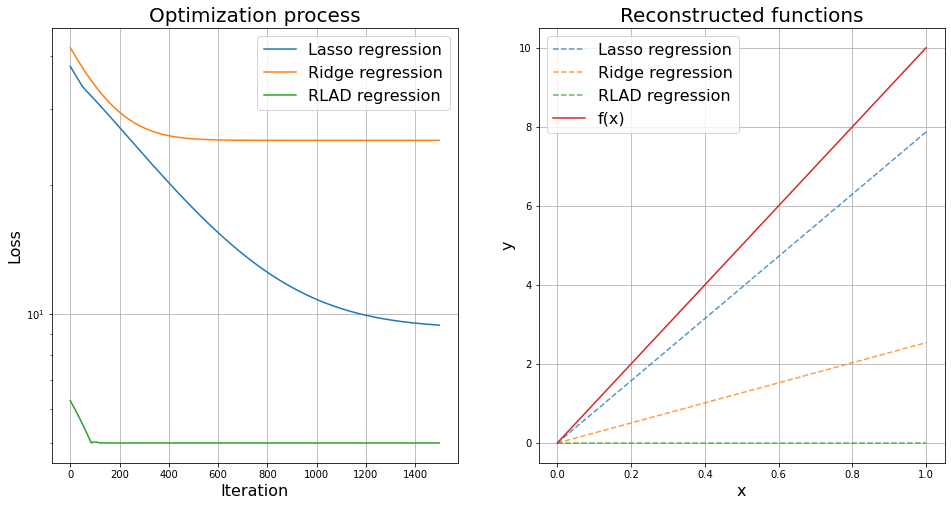

In [70]:
y_lasso = regr_lasso(x).detach().numpy()
y_ridge = regr_ridge(x).detach().numpy()
y_rlad = regr_rlad(x).detach().numpy()

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('Optimization process', fontsize=20)
plt.semilogy(lasso_errors, label='Lasso regression')
plt.semilogy(ridge_errors, label='Ridge regression')
plt.semilogy(rlad_errors, label='RLAD regression')
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Reconstructed functions', fontsize=20)
plt.plot(x, y_lasso, '--', label='Lasso regression', alpha=0.75)
plt.plot(x, y_ridge, '--', label='Ridge regression', alpha=0.75)
plt.plot(x, y_rlad, '--', label='RLAD regression', alpha=0.75)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, '-', label='f(x)', alpha=1.0, scalex=False, scaley=False)
plt.legend(fontsize=16)
plt.grid()

In [71]:
beta_lasso

Parameter containing:
tensor([[7.8701]], requires_grad=True)

In [72]:
beta_ridge

Parameter containing:
tensor([[2.5389]], requires_grad=True)

In [73]:
beta_rlad

Parameter containing:
tensor([[0.0017]], requires_grad=True)